In [1]:
#include<iostream>
#include<array>
#include<string>
using namespace std;

## 7.1 定义函数

In [3]:
void cheers(int n){
    cout<<n;
}
cheers(66);

66

In [4]:
// 带返回值
int bigger(int a,int b){
    if(a>b)
        return a;
    else
        return b;
}
cout<<bigger(4,5);

5

In [5]:
// 函数原型定义
int bigger(int a,int b);

In [6]:
// 原型可以不提供变量名
int bigger(int a);

In [7]:
// c++会按照参数来传递，所以我们传进一个值会拷贝一份
void showp(int a){
    cout<<&a;
}
int b = 10;
cout<<&b<<endl;
showp(b);

0x7fe4aad7d02c
0x7ffe3393b8cc

## 7.3 函数和数组

In [3]:
// 下面我们把数组作为参数传递给函数
void sum(int arr[],int n){
    cout<<arr[1];
}
int arr[3] = {1,2,3};
sum(arr,3);

2

In [4]:
// 这样也是可以的
sum(&arr[0],3);

2

In [5]:
// 这样也可以
sum(arr+1,3);

3

In [6]:
// 所以这个实际上就是传了指针，正确的函数头应该是这样的
void sum(int * arr,int n){
    cout<<arr[1];
}
int arr[3] = {1,2,3};
sum(arr,3);

2

In [7]:
// 注意，因为数组传的是指针，所以我们函数里面修改值会对我们的外面的内容有影响
void change(int * arr){
    arr[1] = 5;
}
int arr[3] = {1,2,3};
cout<<arr[1]<<endl;
change(arr);
cout<<arr[1]<<endl;

2
5


In [8]:
// 为了防止数组里面的值被修改，我就可以这样
void change(const int arr[]){
    arr[1] = 5;
}
int arr[3] = {1,2,3};
change(arr);

input_line_15:3:12: error: read-only variable is not assignable
    arr[1] = 5;
    ~~~~~~ ^


Interpreter Error: 

In [9]:
// 指针常量不能修改
int age = 39;
const int *pt = &age;
*pt+=1;

input_line_16:5:4: error: read-only variable is not assignable
*pt+=1;
~~~^


Interpreter Error: 

In [10]:
//但是我们可以修改age
int age = 39;
const int *pt = &age;
age = 40;
cout<<*pt;

40

In [11]:
// 注意常量变量的指针不能修改
const float mon = 1.63;
float *pm=&mon;

input_line_18:4:8: error: cannot initialize a variable of type 'float *' with an rvalue of type 'const float *'
float *pm=&mon;
       ^  ~~~~


Interpreter Error: 

In [12]:
// 但是下面这种的可以
const float mon = 1.63;
const float *pm=&mon;

## 7.4 函数和二维数组

In [11]:
// 我们可以这样定义函数
int sum1(int arr2[][4],int size)
{
    int total=0;
    for(int r=0;r<size;r++)
        for(int c=0;c<4;c++)
            total+=arr2[r][c];
    return total;
}

In [12]:
int data[3][4] = {{1,2,3,4},{9,8,7,6},{2,4,6,8}};
cout<<sum1(data,3);

60

## 7.5 函数和c风格的字符串

In [ ]:
// 字符串有下面三种表示方式
char ghost[15] = "galloping";
char * str = "galloping";
// 直接使用双引号表示

In [6]:
// 字符串会有结束符/0，我们可以这样
void show(const char *str){
    // 这里当字符串遇到/0时会直接返回0
    while(*str){
        cout<<*str<<" ";
        str++;
    }
}

In [7]:
const char *str = "galloping";
show(str);

g a l l o p i n g 

In [8]:
// 程序返回字符串
char * buildstr(){
    char *str = "666";
    return str;
}
cout<<buildstr();

input_line_16:3:17: warning: ISO C++11 does not allow conversion from string literal to 'char *' [-Wwritable-strings]
    char *str = "666";
                ^


666

## 7.6 函数和结构

In [3]:
struct people {
    int house;
    int mins;
};

In [4]:
// 函数里面的结构体可以这样使用
people sum(people p1,people p2){
    int sum = p1.house+p2.mins;
    people p = {sum,0};
    return p;
}

In [5]:
people p1={1,2};
people p2={2,3};
people p3=sum(p1,p2);
cout<<p3.house;

4

In [6]:
// 默认传结构体是使用复制的方式，函数里面修改不影响外面
void sum(people p1){
    p1.house = 10;
}
people p1={1,2};
sum(p1);
cout<<p1.house;

1

In [7]:
// 我们可以传地址，这样就可以修改了
void sum(people *p1){
    p1->house = 10;
}
people p1={1,2};
sum(&p1);
cout<<p1.house;

10

In [8]:
// 如果是const就表示我们不能去修改

void sum(const people *p1){
    p1->house = 10;
}
people p1={1,2};
sum(&p1);
cout<<p1.house;

input_line_15:2:15: error: cannot assign to variable 'p1' with const-qualified type 'const __cling_N53::people *'
    p1->house = 10;
    ~~~~~~~~~ ^
input_line_15:1:24: note: variable 'p1' declared const here
void sum(const people *p1){
         ~~~~~~~~~~~~~~^~


Interpreter Error: 

## 7.7 函数和string对象

In [2]:
// 函数可以传递strin对象
void display(const string sa[],int n){
    for(int i=0;i<n;i++){
        cout<<i+1<<":"<<sa[i]<<endl;
    }
}
// 我们可以使用下面这种方式来创建多个数组
string slist[3]={
    "123","456","789"
};
display(slist,3);

1:123
2:456
3:789


## 7.8 函数与array对象

In [12]:
void show2(std::array<std::string,4> * a){
    for(int i=0;i<4;i++){
        cout<<i+1<<":"<<(*a)[i]<<endl;
    }
}

In [13]:
std::array<std::string,4> snames = {"spring","summer","fall","winter"};
show2(&snames);

1:spring
2:summer
3:fall
4:winter


## 7.9 递归

In [15]:
// 使用递归来计算累加和
int sum(int n){
    if(n==0) return 0;
    return n + sum(n-1);
}
cout<<sum(100);

5050

## 7.10 函数指针

In [2]:
// 我们先定义一个函数
int sum(int a,int b){
    return a+b;
}
// 函数指针定义如下
int (*ps)(int,int);
// 给函数指针赋值上我们的函数
ps=sum;
// 调用我们的函数指针
cout<< (*ps)(3,4)<<endl;
// 也可以这样直接使用
cout<<ps(3,4)<<endl;

7
7


In [3]:
// 我们可以使用typedef来简化类型
typedef int (*myfunc)(int,int);

In [4]:
void call(myfunc f,int a,int b){
   cout<<f(a,b);
}
call(sum,4,5);

9

## 7.11 

函数是C++的编程模块。要使用函数，必须提供定义和原型，并调
用该函数。函数定义是实现函数功能的代码；函数原型描述了函数的接
口：传递给函数的值的数目和种类以及函数的返回类型。函数调用使得
程序将参数传递给函数，并执行函数的代码。


在默认情况下，C++函数按值传递参数。这意味着函数定义中的形
参是新的变量，它们被初始化为函数调用所提供的值。因此，C++函数
通过使用拷贝，保护了原始数据的完整性。


C++将数组名参数视为数组第一个元素的地址。从技术上讲，这仍
然是按值传递的，因为指针是原始地址的拷贝，但函数将使用指针来访
问原始数组的内容。当且仅当声明函数的形参时，下面两个声明才是等
价的：

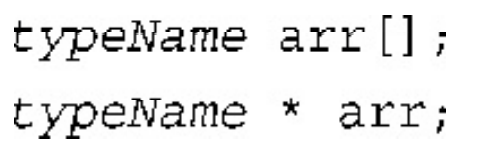

这两个声明都表明，arr是指向typeName的指针，但在编写函数代
码时，可以像使用数组名那样使用arr来访问元素：arr[i]。即使在传递指
针时，也可以将形参声明为const指针，来保护原始数据的完整性。由于
传递数据的地址时，并不会传输有关数组长度的信息，因此通常将数组
长度作为独立的参数来传递。另外，也可传递两个指针（其中一个指向
数组开头，另一个指向数组末尾的下一个元素），以指定一个范围，就
像STL使用的算法一样。